<a href="https://colab.research.google.com/github/Nouman-blip/ml-stuttering-events-dataset/blob/main/groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# groceries

Use the "Run" button to execute the code.

# Groceries EDA

TODO -objectives


-  pattern findings in food consumption
-  customer consumption
-  highest profit sales









In [126]:
pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

download_url= "https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noumankhannoul
Your Kaggle Key: ··········


100%|██████████| 191k/191k [00:00<00:00, 50.8MB/s]

In [5]:
data_filename= "./supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv"

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [6]:
import pandas as pd


In [7]:
df=pd.read_csv(data_filename)
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [8]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [ ]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

3

percentage of missing values 

In [ ]:
missing_percentage = df.isna().sum().sort_values() / len(df)
missing_percentage

Order ID         0.0
Customer Name    0.0
Category         0.0
Sub Category     0.0
City             0.0
Order Date       0.0
Region           0.0
Sales            0.0
Discount         0.0
Profit           0.0
State            0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


## Exploratory Analysis and Visualization

Columns we'll analyze:

1. City
3. profit
4. sales
5. category

In [9]:
df.City

0           Vellore
1       Krishnagiri
2        Perambalur
3        Dharmapuri
4              Ooty
           ...     
9989        Madurai
9990    Kanyakumari
9991           Bodi
9992     Pudukottai
9993    Tirunelveli
Name: City, Length: 9994, dtype: object

In [12]:
cities=df.City.unique()
len(cities)

24

In [11]:
cities_by_customer=df.City.value_counts()
cities_by_customer

Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: City, dtype: int64

In [13]:
cities_by_customer[:5]

Kanyakumari    459
Tirunelveli    446
Bodi           442
Krishnagiri    440
Vellore        435
Name: City, dtype: int64

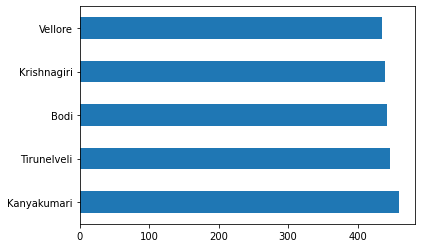

In [14]:
cities_by_customer[:5].plot(kind='barh')

In [15]:
import seaborn as sns
sns.set_style("darkgrid")

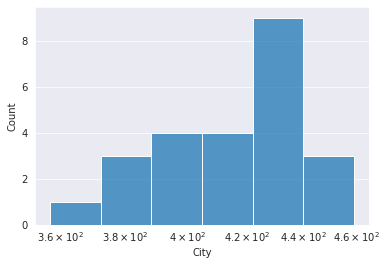

In [16]:
sns.histplot(cities_by_customer, log_scale=True)

In [17]:
cities_by_customer[cities_by_customer==1]

Series([], Name: City, dtype: int64)

In [18]:
df.Category

0            Oil & Masala
1               Beverages
2             Food Grains
3        Fruits & Veggies
4             Food Grains
              ...        
9989    Eggs, Meat & Fish
9990               Bakery
9991          Food Grains
9992         Oil & Masala
9993          Food Grains
Name: Category, Length: 9994, dtype: object

In [19]:
foods=df.Category.unique()
foods
len(foods)

7

In [20]:
food_consumption=df.Category.value_counts()
food_consumption

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: Category, dtype: int64

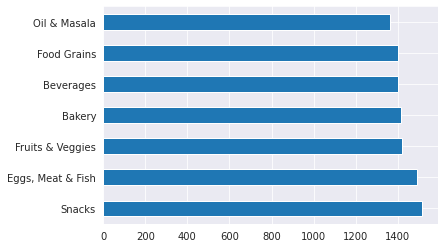

In [21]:
food_consumption.plot(kind='barh')

In [22]:
df.Profit 

0       401.28
1       149.80
2       165.20
3        89.60
4       918.45
         ...  
9989    359.10
9990     71.70
9991    501.44
9992    597.24
9993    165.44
Name: Profit, Length: 9994, dtype: float64

In [24]:
profits=df.Profit.value_counts()
profits

336.00    6
409.92    6
198.00    6
108.80    5
118.80    5
         ..
335.60    1
499.72    1
432.76    1
103.15    1
501.44    1
Name: Profit, Length: 8380, dtype: int64

In [32]:
sort_profit=df.Profit.sort_values()
sort_profit

9551      25.25
4750      25.45
5763      25.55
5460      25.85
7540      26.85
         ...   
9782    1102.50
8134    1103.40
3436    1111.05
3467    1120.50
3159    1120.95
Name: Profit, Length: 9994, dtype: float64

In [41]:
import matplotlib.pyplot as mp

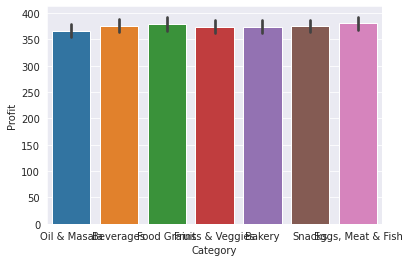

In [114]:
sns.barplot(x=df.Category,y=df.Profit)



In [108]:
df.Discount.unique()
df.Discount.sort_values()

954     0.10
4708    0.10
9377    0.10
5966    0.10
3071    0.10
        ... 
3031    0.35
4860    0.35
9586    0.35
3043    0.35
2795    0.35
Name: Discount, Length: 9994, dtype: float64

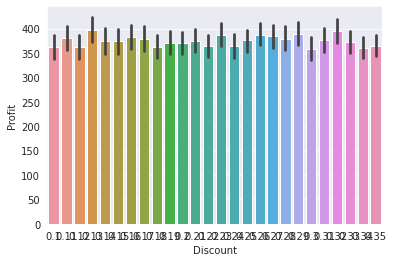

In [105]:
sns.barplot(x=df.Discount,y=df.Profit)

In [115]:
df.Region


0       North
1       South
2        West
3       South
4       South
        ...  
9989     West
9990     West
9991     West
9992     West
9993     West
Name: Region, Length: 9994, dtype: object

In [116]:
regions=df.Region.value_counts()
regions

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

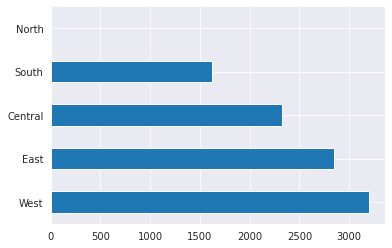

In [121]:
regions.plot(kind='barh')

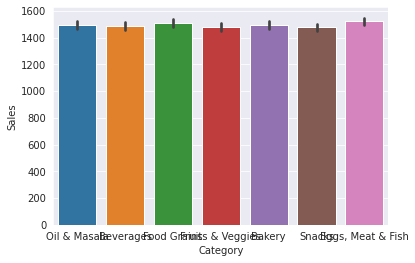

In [123]:
sns.barplot(x=df.Category,y=df.Sales)

## Ask & answer questions

1. which food consumption is most by cutomer?
2. Which 5 cities have the highest number of customers? 
3. in term of Discount, which food sold most time? how discount effect the sales?.
6. which region has most sales?

9. which food has the highest profit?

**answer (1)**

snacks has the highest food consumption.

**answer(2)**

1.Kanyakumari   
2.Tirunelveli    
3.Bodi          
4.Krishnagiri    
5.Vellore      

**answer(3)**

Above graph shows that discount doesn't effect the sales in that case.


**answer(4)**

west region has most sales all time.

**answer(5)**

meat and fish have highest profit.

## Summary and Conclusion


Insights:
- North region has only sale
- highest sales by meat and fish
- need to investigate the data related question in depth 
- like over the year sales 

In [2]:
!pip install jovian
import jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
